In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
# Dictionary to store image paths
image_paths = {
    "train_cataract": [],
    "train_normal": [],
    "test_cataract": [],
    "test_normal": []
}

# Walk through the directory
for dirname, _, filenames in os.walk('data'):
    for filename in filenames:
        path = os.path.join(dirname, filename)
        if "train\\cataract" in path:
            image_paths["train_cataract"].append(path)
        elif "train\\normal" in path:
            image_paths["train_normal"].append(path)
        elif "test\\cataract" in path:
            image_paths["test_cataract"].append(path)
        elif "test\\normal" in path:
            image_paths["test_normal"].append(path)

In [3]:
len(image_paths["train_normal"])

250

In [4]:
from PIL import Image
from matplotlib import pyplot as plt

size of image : (512, 512, 3)


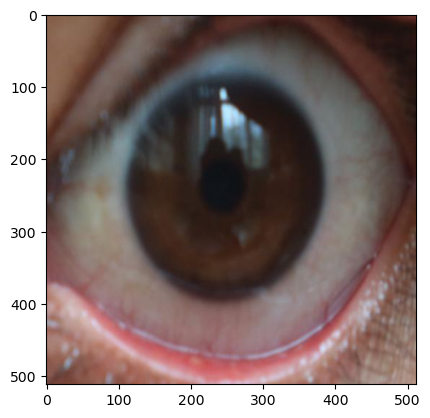

In [5]:
sample_img = np.array(Image.open(image_paths["test_normal"][1]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

size of image : (800, 1200, 3)


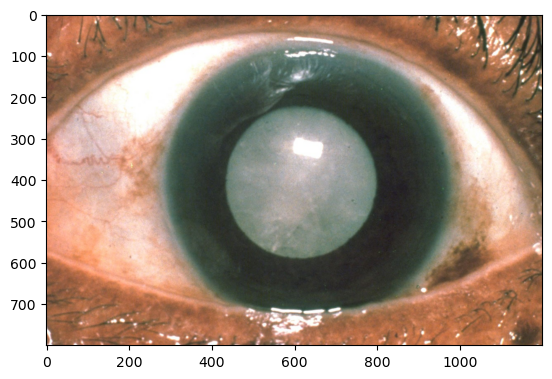

In [6]:
sample_img = np.array(Image.open(image_paths["test_cataract"][0]))
print(f"size of image : {np.shape(sample_img)}")
plt.imshow(sample_img)

In [7]:
training_dir = "data\\train\\"
image_size = (55, 94, 3)
target_size = (55, 94)

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [9]:
train_datagen = ImageDataGenerator(rescale=1/255)
train_generator = train_datagen.flow_from_directory(
    training_dir,
    target_size = target_size,
    class_mode = 'binary'
)

Found 689 images belonging to 2 classes.


In [10]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers.experimental import RMSprop

In [11]:
model = Sequential([
    # Convolutional Neural Network (CNN) for feature extraction
    Conv2D(32, (3, 3), activation='relu', input_shape=image_size),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    # Dense Neural Network (DNN) for classification
    Dense(512, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [12]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 53, 92, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2  (None, 26, 46, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 24, 44, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 12, 22, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 10, 20, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 5, 10, 128)        0

In [13]:
model.compile(
    loss = 'binary_crossentropy',
    optimizer=RMSprop(learning_rate=0.001),
    metrics=['accuracy']
)

In [14]:
history = model.fit(
    train_generator,
    epochs=15
)

Epoch 1/15


22/22 [==============================] - 7s 265ms/step - loss: 0.7115 - accuracy: 0.5878
Epoch 2/15
22/22 [==============================] - 6s 271ms/step - loss: 0.6752 - accuracy: 0.6967
Epoch 3/15
22/22 [==============================] - 6s 239ms/step - loss: 0.4104 - accuracy: 0.8244
Epoch 4/15
22/22 [==============================] - 6s 275ms/step - loss: 0.3650 - accuracy: 0.8403
Epoch 5/15
22/22 [==============================] - 6s 268ms/step - loss: 0.2743 - accuracy: 0.8955
Epoch 6/15
22/22 [==============================] - 6s 266ms/step - loss: 0.2344 - accuracy: 0.9057
Epoch 7/15
22/22 [==============================] - 6s 260ms/step - loss: 0.2292 - accuracy: 0.9115
Epoch 8/15
22/22 [==============================] - 6s 257ms/step - loss: 0.1754 - accuracy: 0.9332
Epoch 9/15
22/22 [==============================] - 6s 249ms/step - loss: 0.1482 - accuracy: 0.9536
Epoch 10/15
22/22 [==============================] - 6s 276ms/step - loss: 0.1295 - accuracy: 0.94

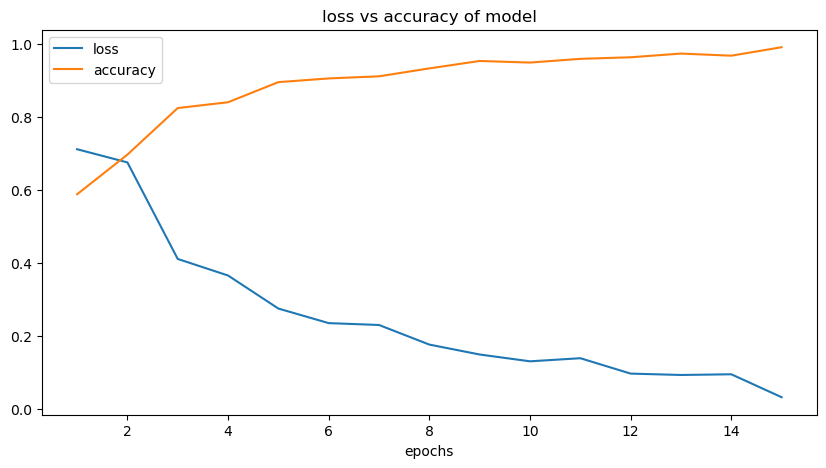

In [15]:
epochs = range(1, 16)
plt.figure(figsize=(10, 5))
plt.title("loss vs accuracy of model")
plt.plot(epochs, history.history['loss'], label='loss')
plt.plot(epochs, history.history['accuracy'], label='accuracy')
plt.grid()
plt.xlabel("epochs")
plt.grid()
plt.legend()

In [16]:
from keras.preprocessing import image

In [17]:
label = train_generator.class_indices
print(label)

{'cataract': 0, 'normal': 1}


1/1 [==============================] - 0s 150ms/step
actual class : cataract
predicted class : cataract


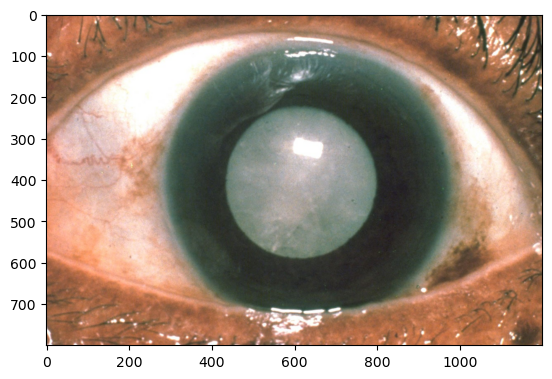

In [18]:
path = image_paths["test_cataract"][0]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("actual class : cataract")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

1/1 [==============================] - 0s 35ms/step
actual class : normal
predicted class : cataract


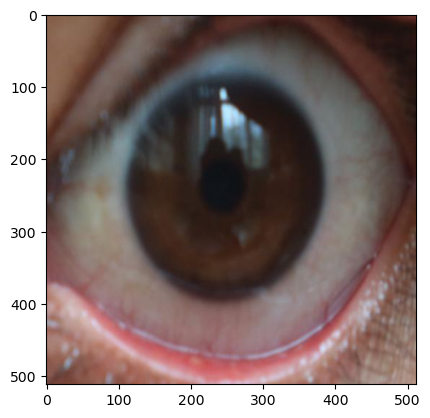

In [19]:
path = image_paths["test_normal"][1]
img = Image.open(path)
plt.imshow(np.array(img))
img = np.array(img.resize((94, 55)))
img = np.expand_dims(img, axis=0)
pred = model.predict(img)
print("actual class : normal")
print(f"predicted class : {'normal' if pred[0] > 0.5 else 'cataract'}")

In [20]:
def _predict(model, path):
    img = np.array(Image.open(path).resize((94, 55)))
    img = np.expand_dims(img, axis=0)
    pred = model.predict(img)
    if pred[0] > 0.5:
        return 'normal'
    else:
        return 'cataract'

In [21]:
def evaluate(model, normal_path, cataract_path):
    normal_pred = []
    cataract_pred = []
    for normal, cataract in zip(normal_path, cataract_path):
        res_cataract = _predict(model, cataract)
        cataract_pred.append(res_cataract)
        
        res_normal = _predict(model, normal)
        normal_pred.append(res_normal)
    
    return normal_pred, cataract_pred

In [22]:
both_size = min(len(image_paths["test_normal"]), len(image_paths["test_cataract"]))
cataract_test_path = image_paths["test_cataract"][:both_size]
normal_test_path = image_paths["test_normal"][:both_size]
normal_pred, cataract_pred = evaluate(model, image_paths["test_normal"], image_paths["test_cataract"])

TypeError: 'int' object is not iterable